In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/Users/akshatrastogi/Desktop/bank-additional-full.csv',sep =';')

In [3]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
col = data.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
def uni(col):
    for i in col:
        a = data[i].unique()
        print(i+" = ",a)

In [9]:
uni(col)

age =  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job =  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital =  ['married' 'single' 'divorced' 'unknown']
education =  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default =  ['no' 'unknown' 'yes']
housing =  ['no' 'yes' 'unknown']
loan =  ['no' 'yes' 'unknown']
contact =  ['telephone' 'cellular']
month =  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week =  ['mon' 'tue' 'wed' 'thu' 'fri']
duration =  [ 261  149  226 ... 1246 1556 1868]
campaign =  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29

**it seem to be there is no nan values in the columns and there is no any special uique characters**

In [10]:
from pandas_profiling import ProfileReport

In [11]:
ProfileReport(data, title="Pandas Profiling Report")

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

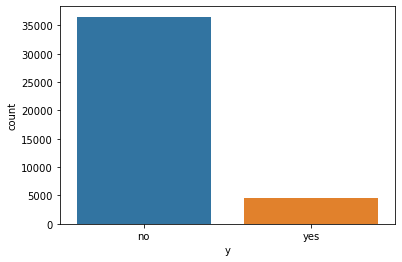

In [12]:
sns.countplot(data['y'])

**We can see from the above plot that the dataset in imbalanced,
where the number of negative class is close to 8 times the number of positive class.**

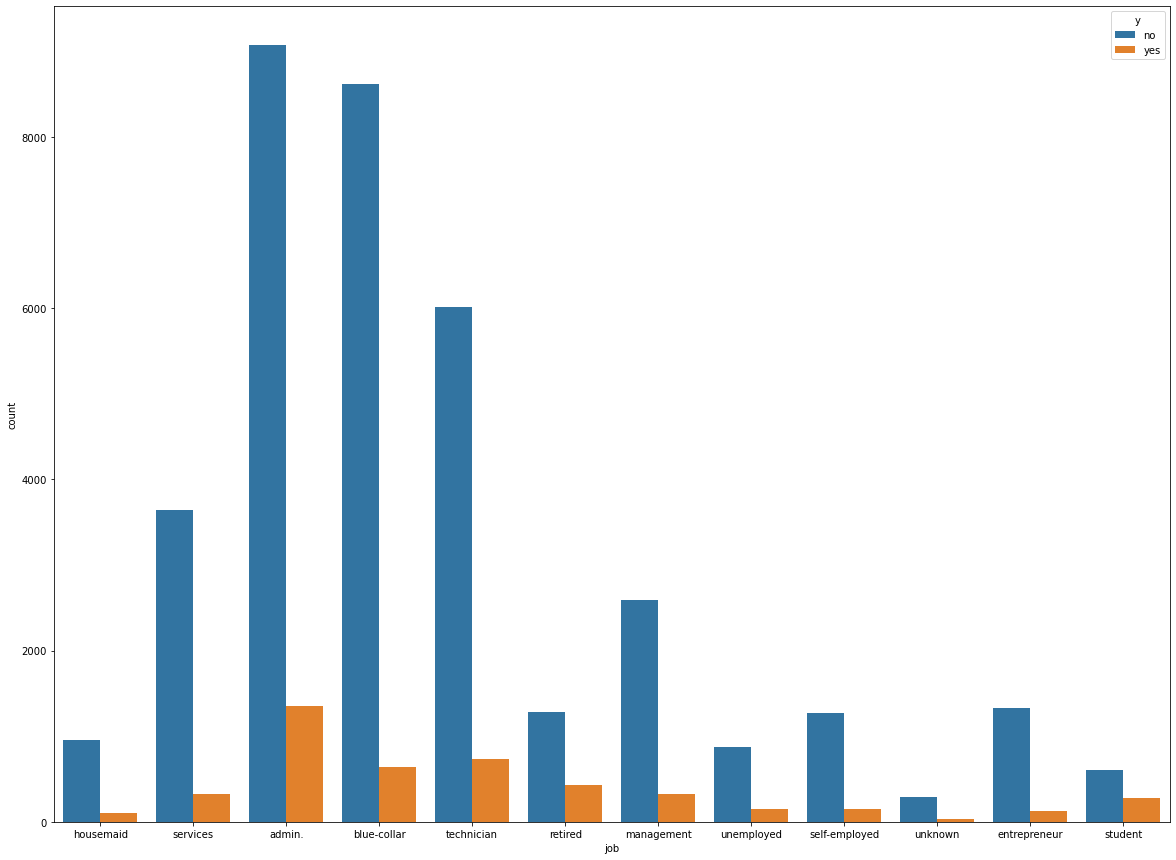

In [13]:
plt.figure(figsize=(20,15))
sns.countplot(x='job', data=data, hue="y")

**From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit,
but they are also the highest when it comes to not subscribing. 
This is simply because we have more customers working as admin than any other profession**

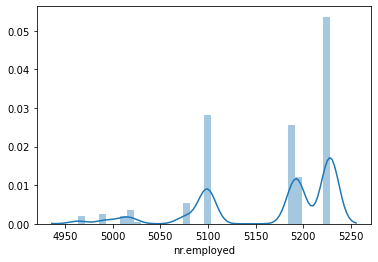

In [14]:
sns.distplot(data['nr.employed'])

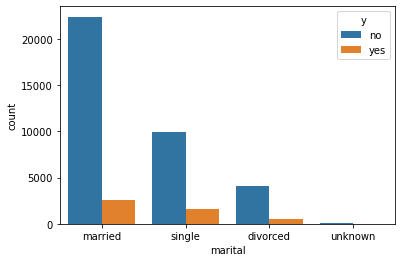

In [15]:
sns.countplot(data['marital'], hue = 'y', data = data)

**Majority of the customers are married. Followed by Single, divorced and unknown.**

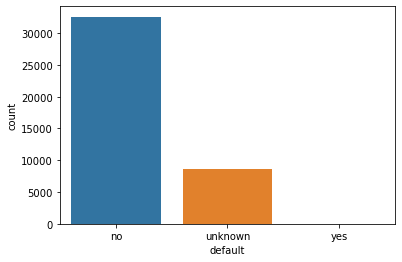

In [16]:
sns.countplot(data['default'])

**Denotes if the customer has credit in default or not. The categories are yes, no and unknown.**

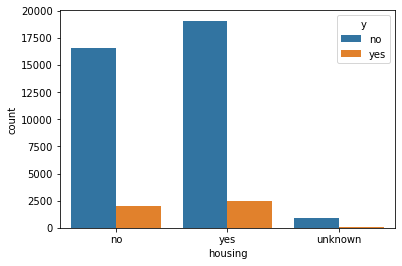

In [17]:
sns.countplot(data['housing'], hue = 'y', data = data)

**As we can see from the above plot, majority of the customers have a housing loan.**

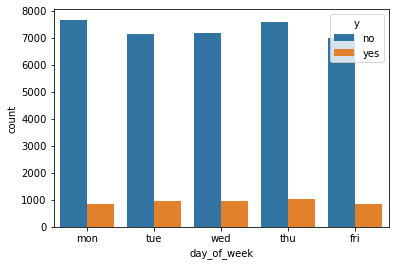

In [18]:
sns.countplot("day_of_week", data= data, hue = 'y')

**As we can see clearly from the above plot that, all the days have the similar distribution for both the classes.
most of the customers on any given day refuse to subscribe to a term deposit, 
and few of customers agrees to subscribe.**

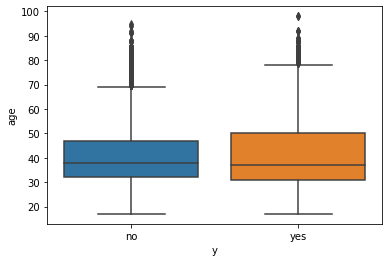

In [19]:
sns.boxplot(x = 'y',y = 'age',data = data)

**From the above boxplot we know that for both the customers that subscibed or didn’t subscribe a term deposit, 
has a median age of around 38–40. And the boxplot for both the classes overlap quite a lot, 
which means that age isn’t necessarily a good indicator for which customer will subscribe and which customer will not.**

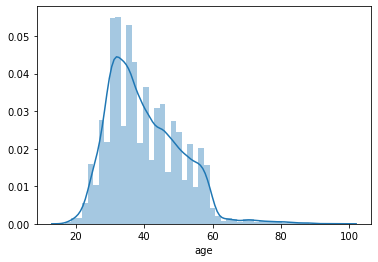

In [20]:
sns.distplot(data['age'])

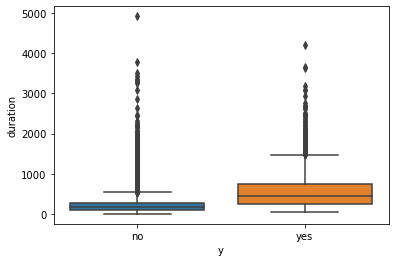

In [21]:
sns.boxplot(x = 'y',y='duration',data = data)

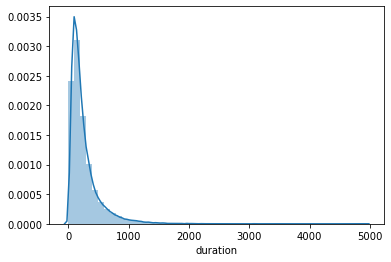

In [22]:
sns.distplot(data['duration'])

**From the above plot it is clear that, the duration (last contact duration) of a customer can be useful
for predicting the target variable. It is expected because it is already mentioned in 
the data overview that this field highely affects the target variable and should only be used for benchmark purposes.**

**Employment variation rate, quarterly indicator. Even though this and 
some other features like “previous” etc are numerical features, they have a limited number of 
unique values which occur repeatedly,Here is a value count of the emp.var.rate feature.**

In [23]:
data['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

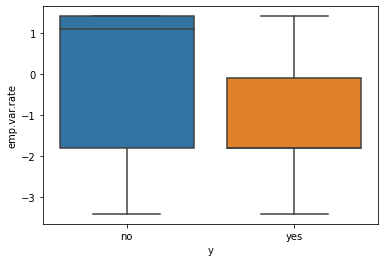

In [24]:
sns.boxplot(x = 'y', y = 'emp.var.rate', data = data)

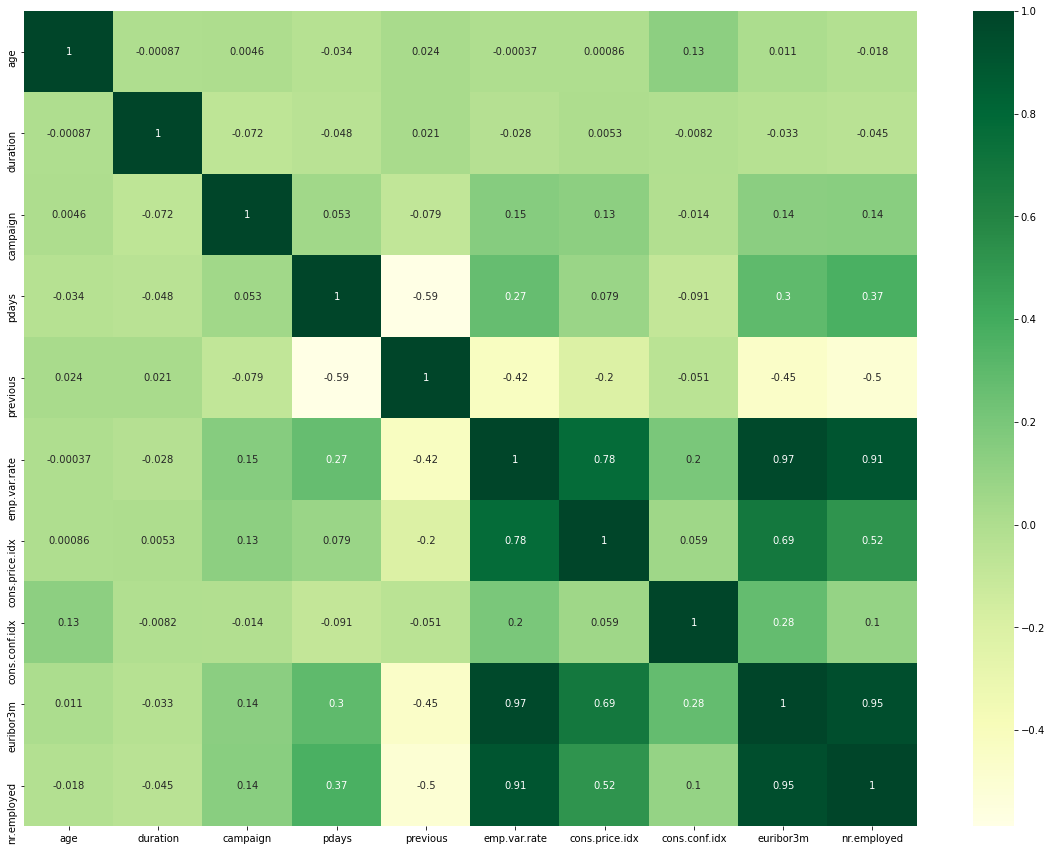

In [25]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), annot = True,cmap="YlGn")

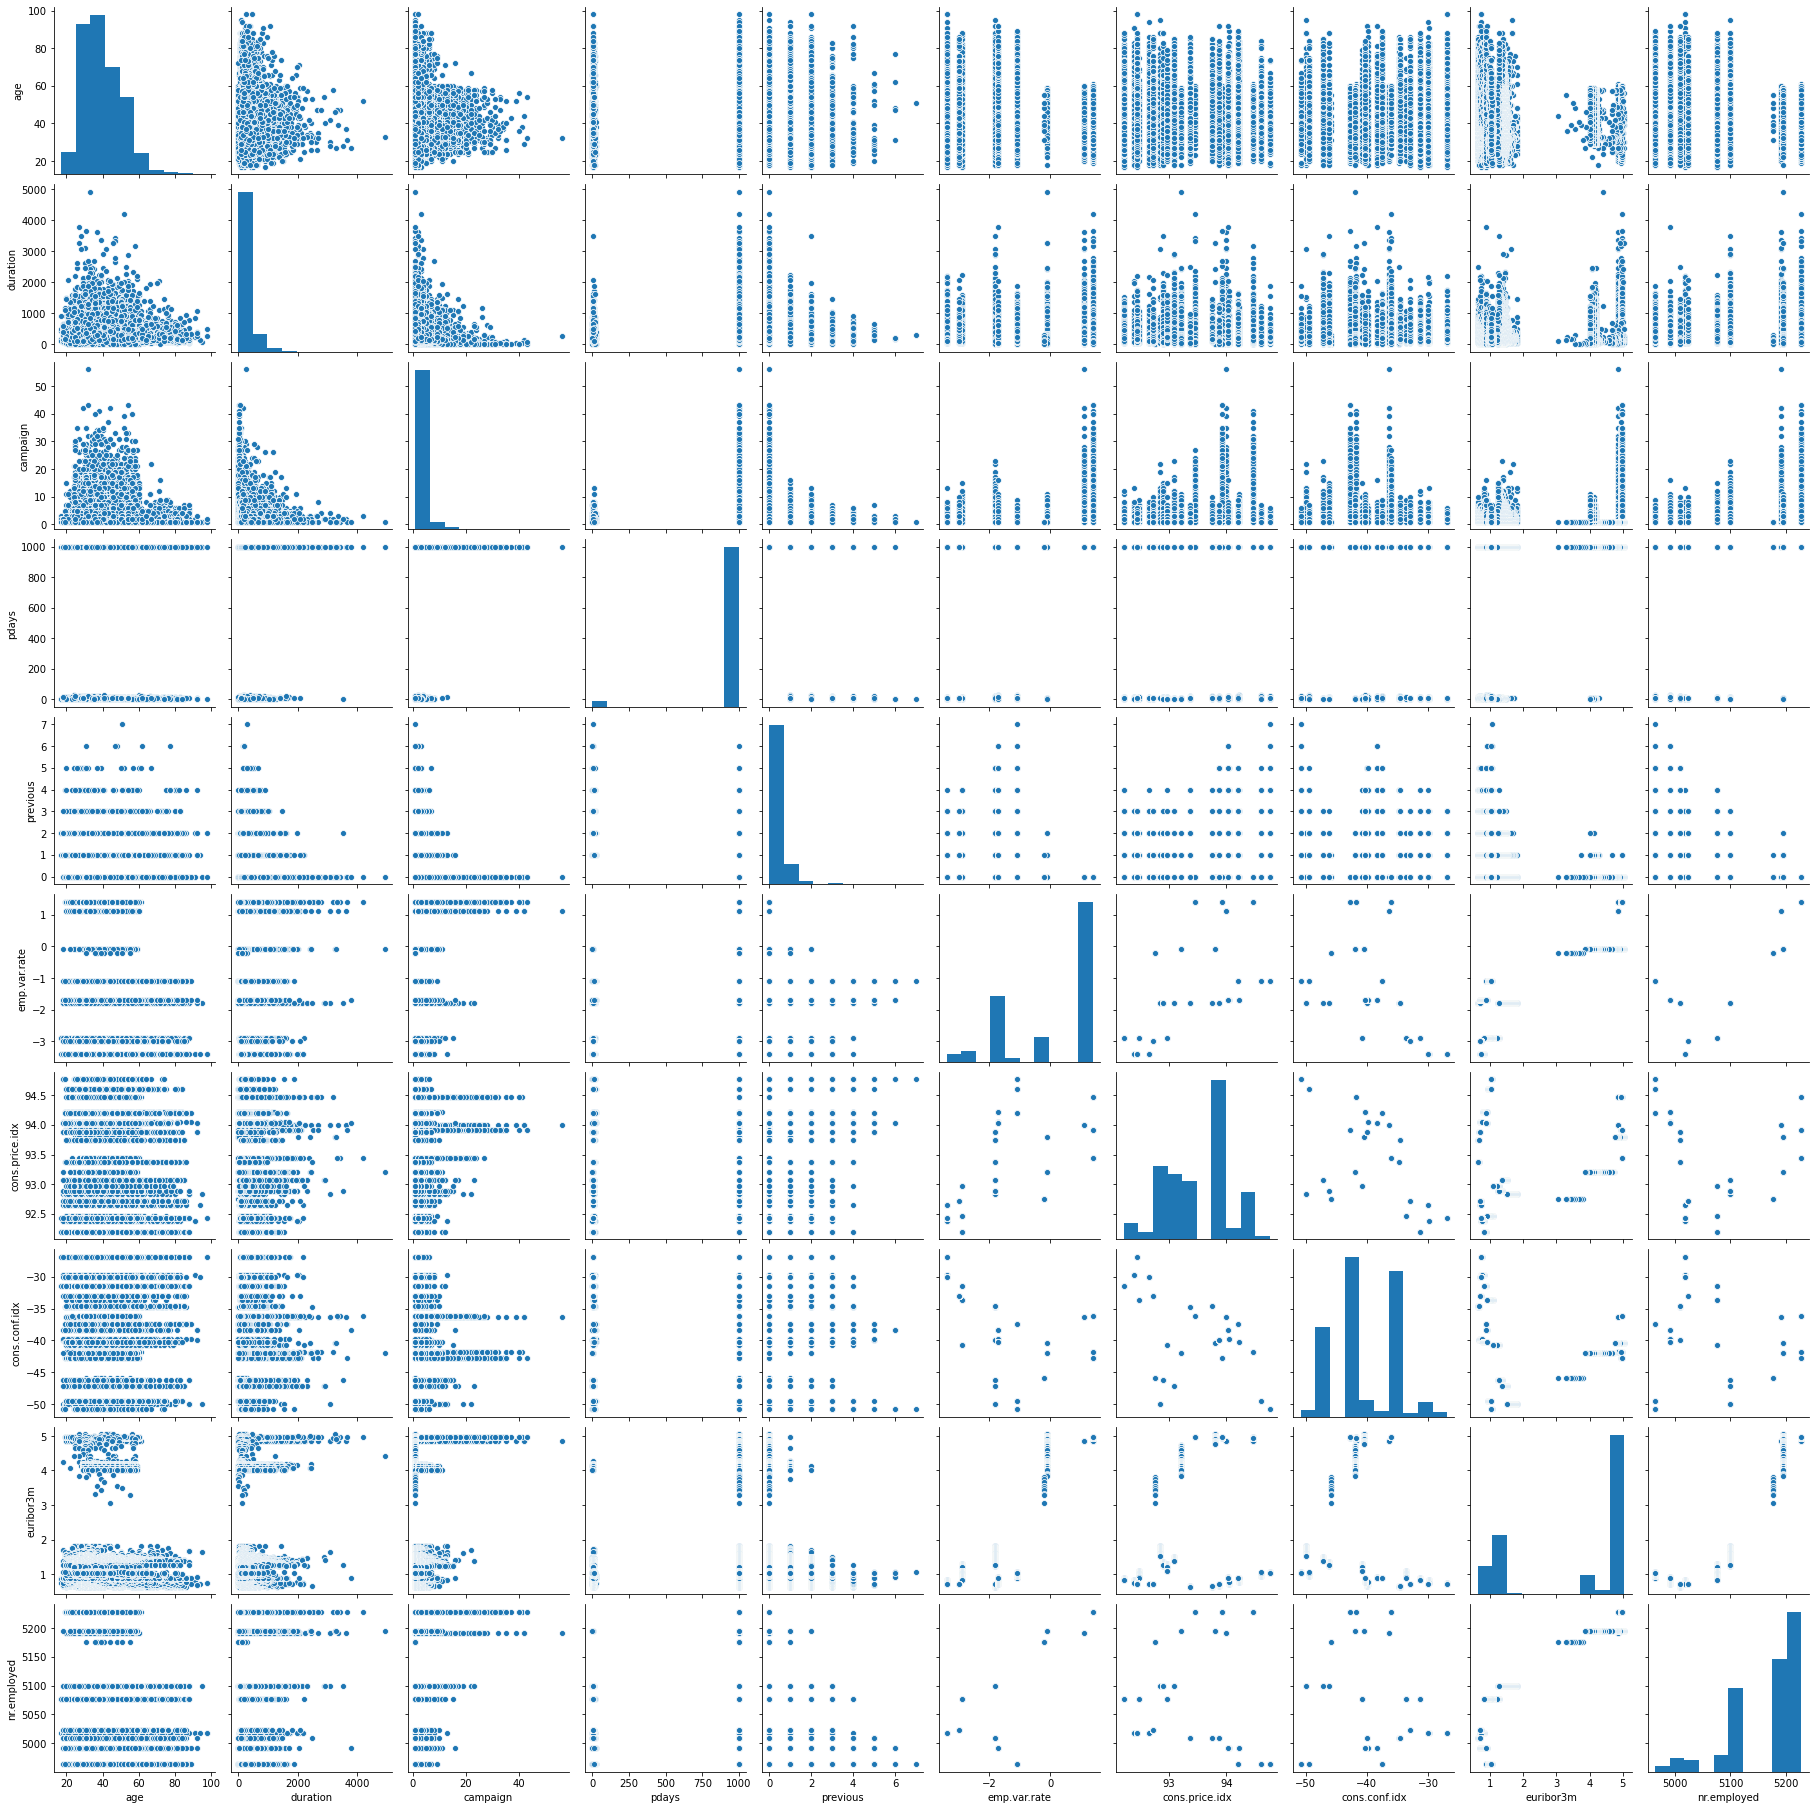

In [26]:
sns.pairplot(data)

In [27]:
data_dup = data[data.duplicated(keep = 'last')]

In [28]:
data_dup

age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1265   telephone   may         thu  ...         1    999         0   
12260  telephone   jul         thu  ...         1    999         0   
14155   cellular   jul         mon  ...         2    999         0   
16819   cellular   jul         thu  ...         3    999         0   
18464   cellular   jul         thu  ...         1    999         0   
20072   cellular   aug         mon  ...         1    999         0   
20531   cellular   aug         tue  ...         1    999         0   
25183   cellular   nov         tue  ...         2    999         0   
28476   cellular   apr         tue  ...         1    999         0   
32505   cellular   may         fri  ...         4    999         0   
36950   cellular   jul         thu  ...         1    999         0   
38255  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1265   nonexistent          1.1          93.994          -36.4      4.855   
12260  nonexistent          1.4          93.918          -42.7      4.966   
14155  nonexistent          1.4          93.918          -42.7      4.962   
16819  nonexistent          1.4          93.918          -42.7      4.962   
18464  nonexistent          1.4          93.918          -42.7      4.968   
20072  nonexistent          1.4          93.444          -36.1      4.965   
20531  nonexistent          1.4          93.444          -36.1      4.966   
25183  nonexistent         -0.1          93.200          -42.0      4.153   
28476  nonexistent         -1.8          93.075          -47.1      1.423   
32505  nonexistent         -1.8          92.893          -46.2      1.313   
36950  nonexistent         -2.9          92.469          -33.6      1.072   
38255  nonexistent         -3.4          92.431          -26.9      0.742   

       nr.employed    y  
1265        5191.0   no  
12260       5228.1   no  
14155       5228.1   no  
16819       5228.1   no  
18464       5228.1   no  
20072       5228.1   no  
20531       5228.1   no  
25183       5195.8   no  
28476       5099.1   no  
32505       5099.1   no  
36950       5076.2  yes  
38255       5017.5   no  

[12 rows x 21 columns]

In [29]:
#As we can see there are some duplicate rows in our datasets, we will remove the duplicates before moving forward.
data = data.drop_duplicates()


In [30]:
data.shape

(41176, 21)

In [29]:
#DAta Preprocessing

In [31]:
cols = data.select_dtypes(include=['object']).columns
cols


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [32]:
# now changing data via label encoding/....
# so thay we can apply for model
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cols:
    data[col] = le.fit_transform(data[col].astype(str))

print (data.info())

<ipython-input-32-63a0d4d619ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [33]:
data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [34]:
X = data.iloc[:,:20]
y = data.iloc[:,20:]

In [35]:
X.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1       261         1    999         0         1           1.1   
1            1       149         1    999         0         1           1.1   
2            1       226         1    999         0         1           1.1   
3            1       151         1    999         0         1           1.1   
4            1       307         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.994          -36.4      4.857       5191.0  
1          93.994          -36.4      4.857       5191.0  
2          93.994          -36.4      4.857       5191.0  
3          93.994          -36.4      4.857       5191.0  
4          93.994          -36.4      4.857       5191.0

In [36]:
y.head()

y
0  0
1  0
2  0
3  0
4  0

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1111)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30882, 20)
(10294, 20)
(30882, 1)
(10294, 1)


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0,)
classifier.fit(X_train, y_train)

/Users/akshatrastogi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear', random_state=0)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[8933,  190],
       [ 827,  344]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9012045851952594

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

0.779730574998465

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm

In [47]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]# Generally we take the values in this range only
    gammas = [0.001, 0.01, 0.1, 1,10]
    param_grid = {'C': Cs, 'gamma' : gammas}# this is dictionary we are creating so as to get the best tuning
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)# coming from sklearn.modelselection
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [48]:
svc_param_selection(X_train,y_train,5)

/Users/akshatrastogi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/akshatrastogi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/akshatrastogi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/akshatrastogi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

KeyboardInterrupt: 

In [49]:
classifier2 = SVC(kernel = 'linear', random_state = 0,C = 10, gamma =  0.01)
classifier2.fit(X_train, y_train)

/Users/akshatrastogi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=10, gamma=0.01, kernel='linear', random_state=0)

In [50]:
y_pred_tu = classifier2.predict(X_test)

In [51]:
y_pred_tu

array([0, 1, 0, ..., 0, 0, 1])

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_tu)

0.9012045851952594

In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_tu)

0.6364697647194387

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_tu))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9123
           1       0.64      0.29      0.40      1171

    accuracy                           0.90     10294
   macro avg       0.78      0.64      0.67     10294
weighted avg       0.88      0.90      0.88     10294



In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_tu)
cm

array([[8933,  190],
       [ 827,  344]])